In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [2]:
df = pd.read_csv(r"C:\Users\Cirrolytix\Documents\Python Bootcamp\happiness.csv")

In [3]:
df

,Unnamed: 0,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Scaled.Dystopia,Scaled.Happiness
0,0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.856296,1.935996
1,1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.929891,1.922693
2,2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.947964,1.906730
3,3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0.855673,1.897861
4,4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1.163581,1.875689
5,5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,0.891964,1.794098
6,6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,0.676200,1.740000
7,7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,0.393687,1.738226
8,8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,0.496175,1.711620
9,9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,0.431315,1.711620


In [4]:
df.dtypes

Unnamed: 0                         int64
Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
Scaled.Dystopia                  float64
Scaled.Happiness                 float64
dtype: object

In [47]:
# pred1 = df[["Whisker.high", "Whisker.low", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption.", "Dystopia.Residual", "Scaled.Dystopia", "Scaled.Happiness"]]
# pred2 = df[["Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption.", "Dystopia.Residual", "Scaled.Dystopia", "Scaled.Happiness"]]
# pred3 = df[["Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption.", "Dystopia.Residual"]]
# pred4 = df[["Economy..GDP.per.Capita.", "Health..Life.Expectancy.", "Freedom", "Trust..Government.Corruption.", "Dystopia.Residual"]]
# pred5 = df[["Economy..GDP.per.Capita.", "Health..Life.Expectancy.", "Trust..Government.Corruption.", "Dystopia.Residual"]]
pred6 = df[["Family", "Freedom", "Generosity"]]

In [7]:
pred1

,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Scaled.Dystopia,Scaled.Happiness
0,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.856296,1.935996
1,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.929891,1.922693
2,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.947964,1.906730
3,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0.855673,1.897861
4,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1.163581,1.875689
5,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,0.891964,1.794098
6,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,0.676200,1.740000
7,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,0.393687,1.738226
8,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,0.496175,1.711620
9,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,0.431315,1.711620


In [27]:
lm.fit(pred4, df["Happiness.Score"])
lm.score(pred4, df["Happiness.Score"])

0.9564493159012961

In [28]:
pd.DataFrame(list(zip(pred3.columns, lm.coef_)), columns = ['features', 'coefficients'])

,features,coefficients
0,Economy..GDP.per.Capita.,1.260403
1,Family,1.234947
2,Health..Life.Expectancy.,1.706146
3,Freedom,0.991120
4,Generosity,0.980188


In [19]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

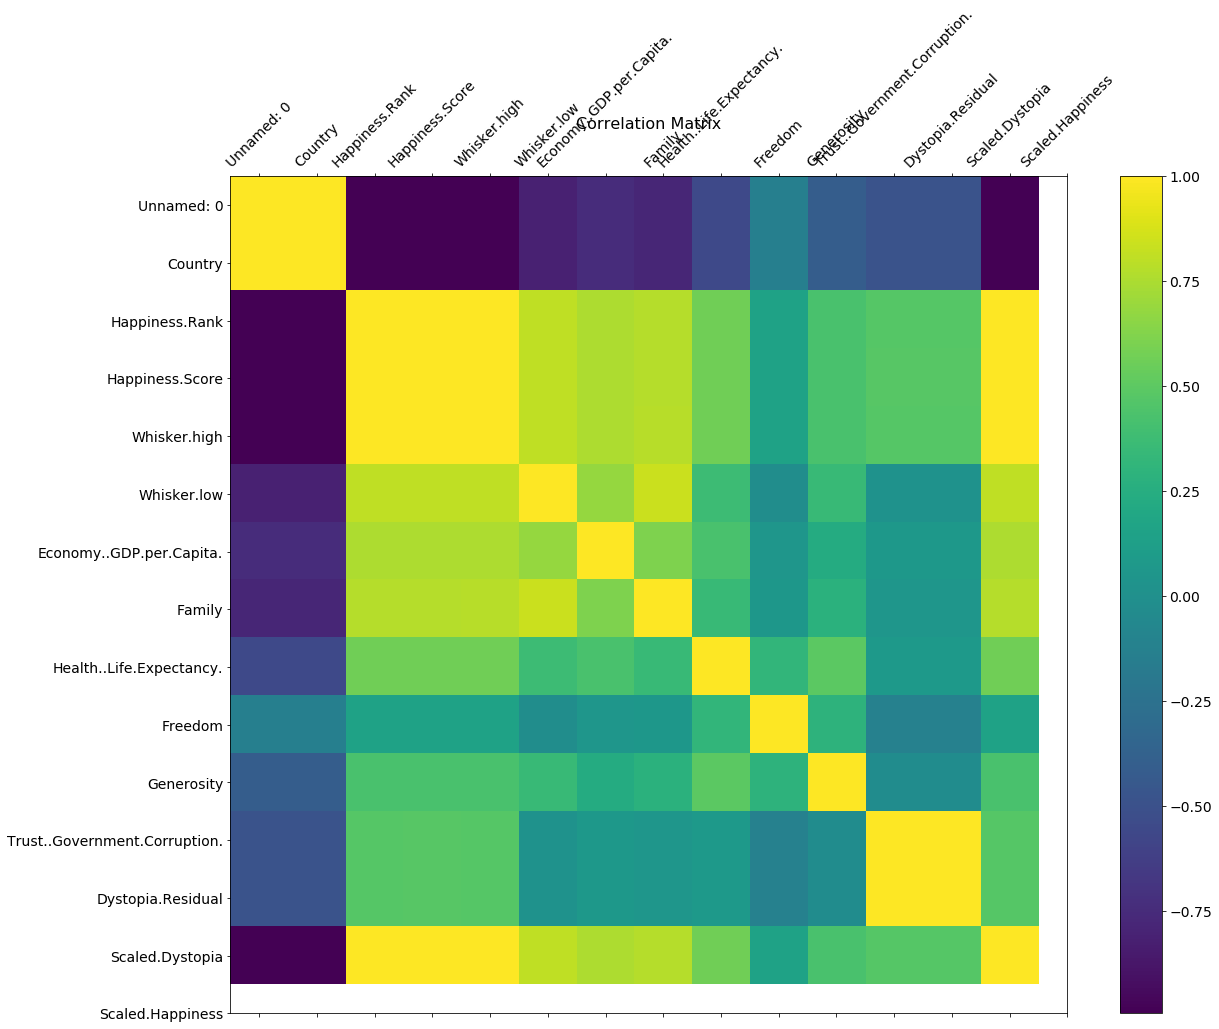

In [20]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [23]:
lm.fit(pred3, df["Happiness.Score"])
lm.predict(pred3)

array([7.53707961, 7.52179839, 7.50374335, 7.49433245, 7.46914024,
       7.37694815, 7.31640403, 7.31400163, 7.28367312, 7.28406859,
       7.21316059, 7.07907465, 7.00619047, 6.99259579, 6.97697579,
       6.95068714, 6.8910006 , 6.86280071, 6.71401598, 6.65174637,
       6.64808638, 6.63533819, 6.60879312, 6.59857917, 6.57763863,
       6.57208108, 6.52715595, 6.45394851, 6.45373399, 6.45188115,
       6.44160093, 6.42444583, 6.42248172, 6.4030474 , 6.37459771,
       6.35705732, 6.34368344, 6.16779662, 6.10503387, 6.09754735,
       6.08728598, 6.08365836, 6.07143169, 6.00839848, 6.00317535,
       5.97284403, 5.97135422, 5.963747  , 5.9630287 , 5.95566523,
       5.91992417, 5.90174197, 5.8721054 , 5.85032899, 5.83847828,
       5.83754615, 5.82471937, 5.82306762, 5.82202425, 5.81859565,
       5.81048018, 5.75829487, 5.71531359, 5.62900697, 5.62095559,
       5.61150529, 5.56929811, 5.52498711, 5.50001223, 5.49314126,
       5.47162319, 5.43030798, 5.39515667, 5.33627874, 5.32429

0.9999999389907863

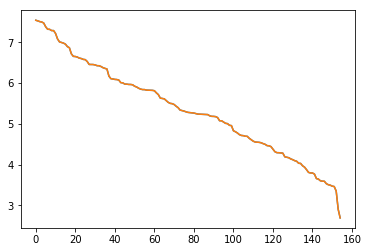

In [60]:
dataset = pred3
lm.fit(dataset, df["Happiness.Score"])
prediction = pd.DataFrame(lm.predict(dataset))
prediction.columns = ['pred_y']
output = df.join(prediction, how='inner')
plt.plot(output.index, output["Happiness.Score"])
plt.plot(output.index, output["pred_y"])
lm.score(dataset, df["Happiness.Score"])


In [50]:
pd.DataFrame(list(zip(dataset.columns, lm.coef_)), columns = ['features', 'coefficients'])

,features,coefficients
0,Family,2.464963
1,Freedom,2.222756
2,Generosity,0.249610
